In [ ]:
# Tasks:
# Data Import and Cleaning:

# Import the dataset using Pandas.
# Identify missing values and handle them appropriately.
# Use NumPy to convert relevant columns to numerical types if necessary.
# Exploratory Data Analysis:

# Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
# Explore the distribution of power plants by country and fuel type.
# Statistical Analysis:

# Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
# Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.
# Time Series Analysis:

# If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
# Explore how the mix of fuel types for power generation has evolved over the years.
# Advanced Visualization:

# Create visualizations using Matplotlib and Seaborn to illustrate your findings.
# Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.
# Matrix Operations in Real-World Context:

# Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
# Discuss the relevance of eigenvectors and eigenvalues in this context.
# Integrating NumPy with Pandas and Matplotlib:

# Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
# Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [35]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("e.csv")   # change name if different

# Basic inspection
print(df.head())
print("\n")
print(df.info())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

/tmp/ipython-input-1395550351.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("e.csv")   # change name if different


In [36]:
print(df.isnull().sum().sort_values(ascending=False))

other_fuel3                       34844
other_fuel2                       34660
other_fuel1                       32992
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277
generation_data_source            23536
year_of_capacity_data             20049
estimated_generation_gwh_2013     18816
wepp_id                           18702
estimated_generation_gwh_2014     18433
estimated_generation_gwh_2015     17886
commissioning_year                17489
estimated_generation_gwh_2016     17366
owner                             14068
estimated_generation_gwh_2017      1798
geolocation_source                  419
url                                  18
source                               15
country                               0
gppd_idnr                             0


In [37]:
cols_to_drop = [
    'other_fuel1', 'other_fuel2', 'other_fuel3',
    'generation_gwh_2013', 'generation_gwh_2014',
    'generation_gwh_2015', 'generation_gwh_2016',
    'generation_gwh_2017', 'generation_gwh_2018',
    'generation_gwh_2019',
    'generation_data_source',
    'wepp_id',
    'year_of_capacity_data',
    'estimated_generation_gwh_2013',
    'estimated_generation_gwh_2014',
    'estimated_generation_gwh_2015',
    'estimated_generation_gwh_2016'
]

df = df.drop(columns=cols_to_drop)

print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner',
       'source', 'url', 'geolocation_source', 'estimated_generation_gwh_2017',
       'estimated_generation_note_2013', 'estimated_generation_note_2014',
       'estimated_generation_note_2015', 'estimated_generation_note_2016',
       'estimated_generation_note_2017'],
      dtype='object')


In [38]:
# Convert to numeric (safety)
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')

# Keep realistic years
df = df[(df['commissioning_year'].isna()) |
        ((df['commissioning_year'] >= 1900) & (df['commissioning_year'] <= 2023))]

print("Year stats:")
print(df['commissioning_year'].describe())

Year stats:
count    17445.000000
mean      1997.426278
std         23.374698
min       1900.000000
25%       1988.000000
50%       2007.000000
75%       2014.000000
max       2020.000000
Name: commissioning_year, dtype: float64


In [41]:
# Round year and convert to integer
df['commissioning_year'] = df['commissioning_year'].round().astype('Int64')

plants_per_year = (
    df.dropna(subset=['commissioning_year'])
      .groupby('commissioning_year')
      .size()
)

print(plants_per_year.tail(10))

commissioning_year
2011    619
2012    772
2013    680
2014    828
2015    820
2016    886
2017    783
2018    621
2019    600
2020    151
dtype: int64


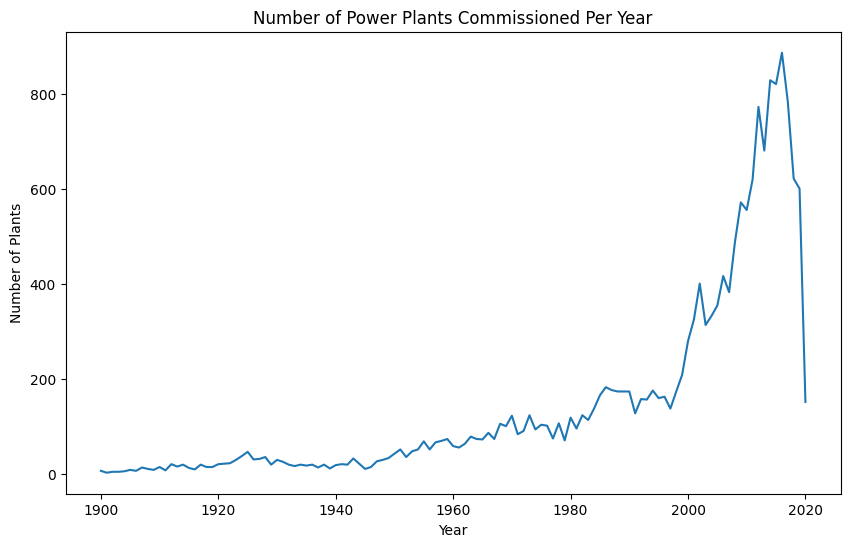

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(plants_per_year.index, plants_per_year.values)
plt.title("Number of Power Plants Commissioned Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Plants")
plt.show()

In [43]:
capacity_per_year = (
    df.dropna(subset=['commissioning_year'])
      .groupby('commissioning_year')['capacity_mw']
      .sum()
)

print(capacity_per_year.tail(10))

commissioning_year
2011    115751.14640
2012    132796.61120
2013    149774.84336
2014    129127.47138
2015    132524.48349
2016    134387.67754
2017     59962.39000
2018     39542.30000
2019     23230.40000
2020      6196.80000
Name: capacity_mw, dtype: float64


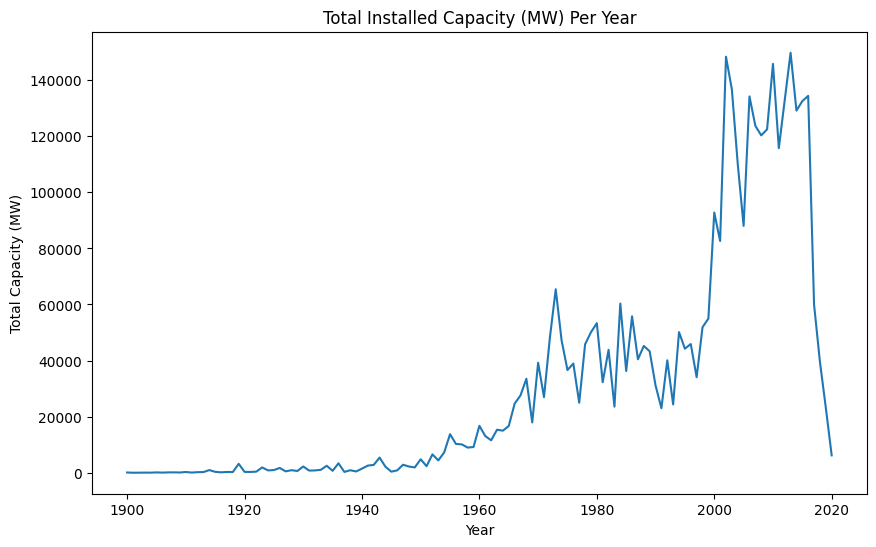

In [44]:
plt.figure(figsize=(10,6))
plt.plot(capacity_per_year.index, capacity_per_year.values)
plt.title("Total Installed Capacity (MW) Per Year")
plt.xlabel("Year")
plt.ylabel("Total Capacity (MW)")
plt.show()

In [45]:
fuel_year = (
    df.dropna(subset=['commissioning_year'])
      .groupby(['commissioning_year', 'primary_fuel'])
      .size()
      .unstack(fill_value=0)
)

print(fuel_year.tail())

primary_fuel        Biomass  Coal  Cogeneration  Gas  Geothermal  Hydro  \
commissioning_year                                                        
2016                      8    84             1   48           0     45   
2017                      3    46             0   49           1     22   
2018                      3    14             0   51           3      4   
2019                      2     0             1   35           2      1   
2020                      1     0             0    6           0      0   

primary_fuel        Nuclear  Oil  Other  Petcoke  Solar  Storage  Waste  Wind  
commissioning_year                                                             
2016                      0   39      0        0    466       12     16   167  
2017                      0    4      1        0    523       19      7   108  
2018                      0    8      1        0    481       10      5    41  
2019                      0    3      0        0    459       32      3   

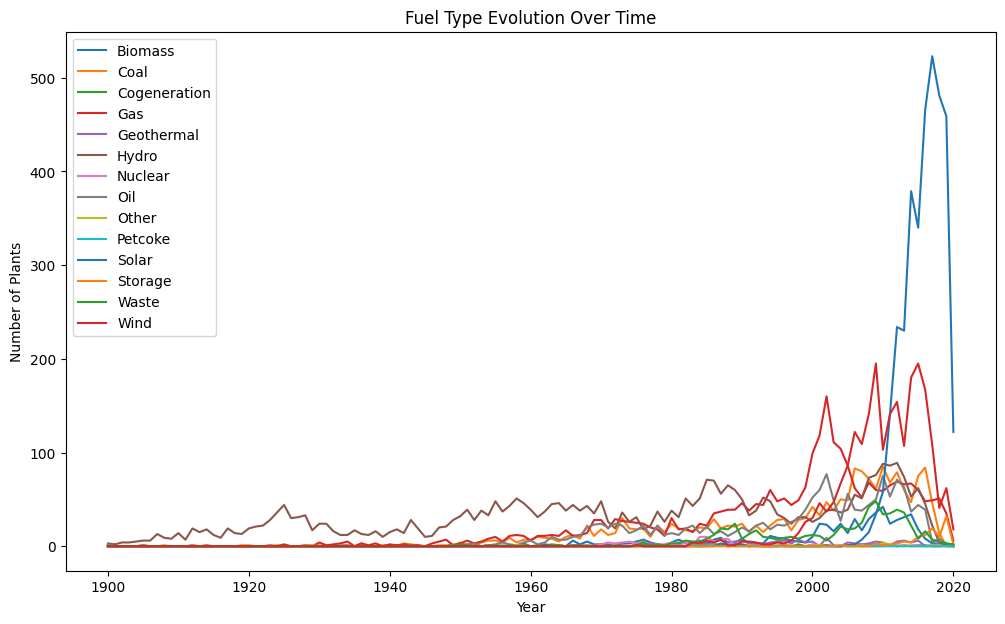

In [46]:
plt.figure(figsize=(12,7))

for fuel in fuel_year.columns:
    plt.plot(fuel_year.index, fuel_year[fuel], label=fuel)

plt.title("Fuel Type Evolution Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Plants")
plt.legend()
plt.show()

In [47]:
major_fuels = ['Coal', 'Gas', 'Hydro', 'Solar', 'Wind']

df_major = df[df['primary_fuel'].isin(major_fuels)]

capacity_stats = df_major.groupby('primary_fuel')['capacity_mw'].agg(
    ['mean', 'median', 'std', 'count']
)

print(capacity_stats)

                    mean  median         std  count
primary_fuel                                       
Coal          843.579828   600.0  888.187187   2330
Gas           373.449375   147.5  560.934146   3998
Hydro         147.211968    20.0  549.880872   7154
Solar          17.657039     5.8   41.939412  10665
Wind           49.224126    27.0  106.138355   5344


In [48]:
from scipy.stats import ttest_ind

fossil = df[df['primary_fuel'].isin(['Coal', 'Gas'])]['capacity_mw']
renewable = df[df['primary_fuel'].isin(['Solar', 'Wind'])]['capacity_mw']

t_stat, p_value = ttest_ind(fossil, renewable, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 55.97756714503301
P-value: 0.0


In [49]:
import numpy as np

matrix_data = df[['capacity_mw', 'latitude', 'longitude']].dropna()

X = matrix_data.values

# Covariance matrix
cov_matrix = np.cov(X.T)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 2.39755729e+05 -1.46478980e+02  5.81642149e+03]
 [-1.46478980e+02  5.12533876e+02 -1.21308343e+02]
 [ 5.81642149e+03 -1.21308343e+02  6.14716792e+03]]


In [50]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[239900.55076411   6004.95852617    509.92148456]

Eigenvectors:
[[-9.99690366e-01  2.48830112e-02  9.13636229e-05]
 [ 6.24305317e-04  2.14109678e-02  9.99770564e-01]
 [-2.48753459e-02 -9.99461058e-01  2.14198728e-02]]
